In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1W

In [5]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [6]:
df[df.duplicated()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


# 1. What is the average rating for each product category?

In [7]:
df['main_category'] = df['category'].apply(lambda x : x.split('|')[0])

In [8]:
df = df[~(df['rating'] == '|')]

In [9]:
df['rating'] = df['rating'].astype('float')

In [10]:
A = df.groupby('main_category')['rating'].mean().reset_index()

In [11]:
A

,main_category,rating
0,Car&Motorbike,3.800000
1,Computers&Accessories,4.154967
2,Electronics,4.081749
3,Health&PersonalCare,4.000000
4,Home&Kitchen,4.040716
5,HomeImprovement,4.250000
6,MusicalInstruments,3.900000
7,OfficeProducts,4.309677
8,Toys&Games,4.300000


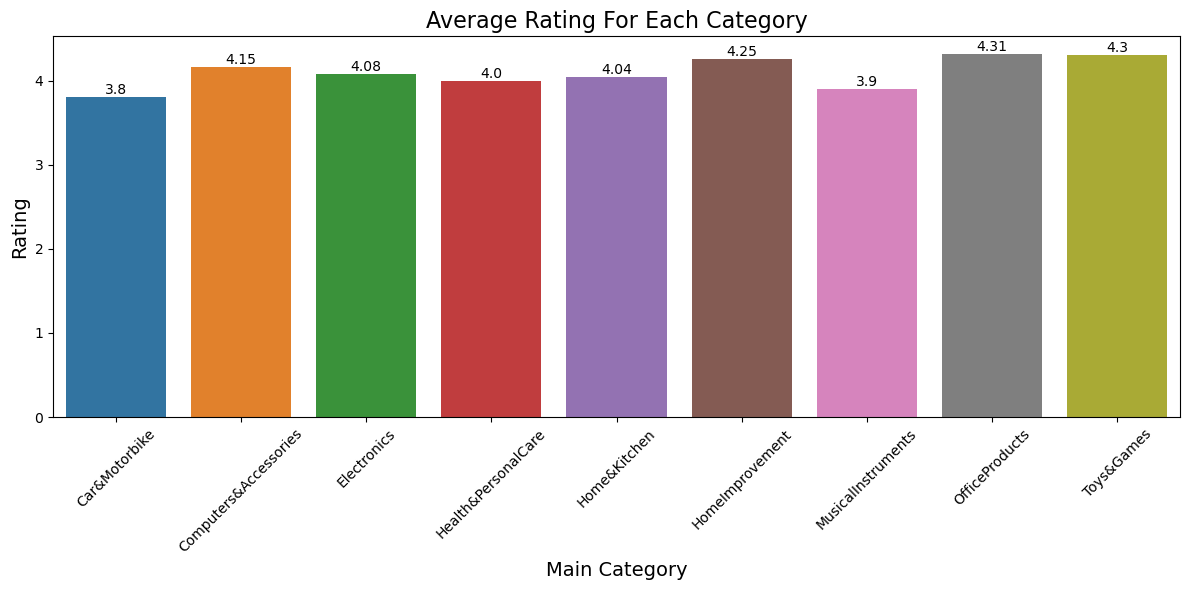

In [12]:
plt.figure(figsize = (12, 6))
sns.barplot(data = A, x = 'main_category', y = 'rating')
plt.xlabel('Main Category', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.title('Average Rating For Each Category', fontsize = 16)
plt.xticks(rotation = 45)

for index, value in enumerate(A['rating']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. What are the top rating_count products by category?

In [13]:
def convert_rating_count(x):
    if ',' in x:
        a = x.replace(',','')
        return int(a)
    elif x == 'nan':
        return 0
    else:
        return int(x)

In [14]:
df['rating_count'] = df['rating_count'].apply(lambda x : convert_rating_count(str(x)))

In [15]:
B = df[['product_name', 'main_category', 'rating_count']].sort_values(by = 'rating_count', ascending = False)

In [16]:
def create(data):
    d = {'product_name' : [], 'main_category' : [], 'rating_count' : []}
    for i, row in data.iterrows():
        if row['main_category'] not in d['main_category']:
            d['product_name'].append(row['product_name'])
            d['main_category'].append(row['main_category'])
            d['rating_count'].append(row['rating_count'])
    return d

a = create(B)

In [17]:
result = pd.DataFrame(a)

In [18]:
result

,product_name,main_category,rating_count
0,"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",Electronics,426973
1,"Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your Kitchen (12420, Green, 400 ml)",Home&Kitchen,270563
2,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories,253105
3,Boya ByM1 Auxiliary Omnidirectional Lavalier Condenser Microphone with 20ft Audio Cable (Black),MusicalInstruments,68664
4,Faber-Castell Connector Pen Set - Pack of 25 (Assorted),Toys&Games,15867
5,"Casio FX-82MS 2nd Gen Non-Programmable Scientific Calculator, 240 Functions and 2-line Display, Black",OfficeProducts,12179
6,"Gizga Essentials Cable Organiser, Cord Management System for PC, TV, Home Theater, Speaker & Cables, Reusable Cable Organizer for Desk, WFH Accessories, Organizer Tape Roll, Reusable Cable Ties Strap",HomeImprovement,5985
7,Dr Trust Electronic Kitchen Digital Scale Weighing Machine (Blue),Health&PersonalCare,3663
8,"Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black",Car&Motorbike,1118


# 3. What is the distribution of discounted prices vs actual prices?

In [19]:
df['discounted_price'] = df['discounted_price'].apply(lambda x : x[1:])
df['actual_price'] = df['actual_price'].apply(lambda x : x[1:])

In [20]:
def convert_prices(x):
    if ',' in x:
        a = x.replace(',','')
        if '.' in a:
            l = a.split('.')
            return int(l[0])
    elif '.' in x:
        l = x.split('.')
        return int(l[0])
    else:
        return int(x)

In [21]:
df['discounted_price'] = df['discounted_price'].apply(convert_prices)
df['actual_price'] = df['actual_price'].apply(convert_prices)

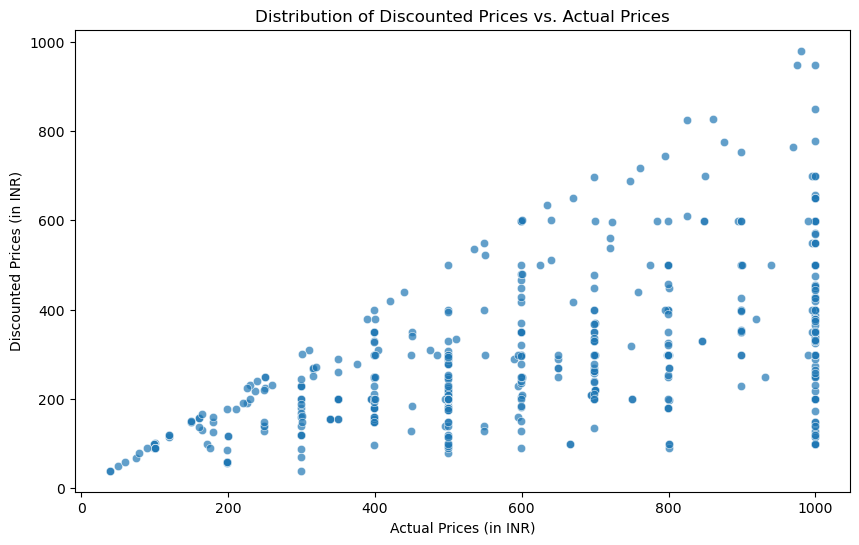

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', alpha=0.7)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Prices (in INR)')
plt.ylabel('Discounted Prices (in INR)')
plt.show()

# 4. How does the average discount percentage vary across categories?

In [23]:
C = df[['discount_percentage', 'main_category']]

In [24]:
C['percentage'] = C['discount_percentage'].str.replace('%','')

C:\Users\Hamada Salim G Trd\AppData\Local\Temp\ipykernel_5152\3425129995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['percentage'] = C['discount_percentage'].str.replace('%','')


In [25]:
C['percentage'] = C['percentage'].astype('int')

C:\Users\Hamada Salim G Trd\AppData\Local\Temp\ipykernel_5152\2270143507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C['percentage'] = C['percentage'].astype('int')


In [26]:
p = C.groupby('main_category')['percentage'].mean().reset_index()

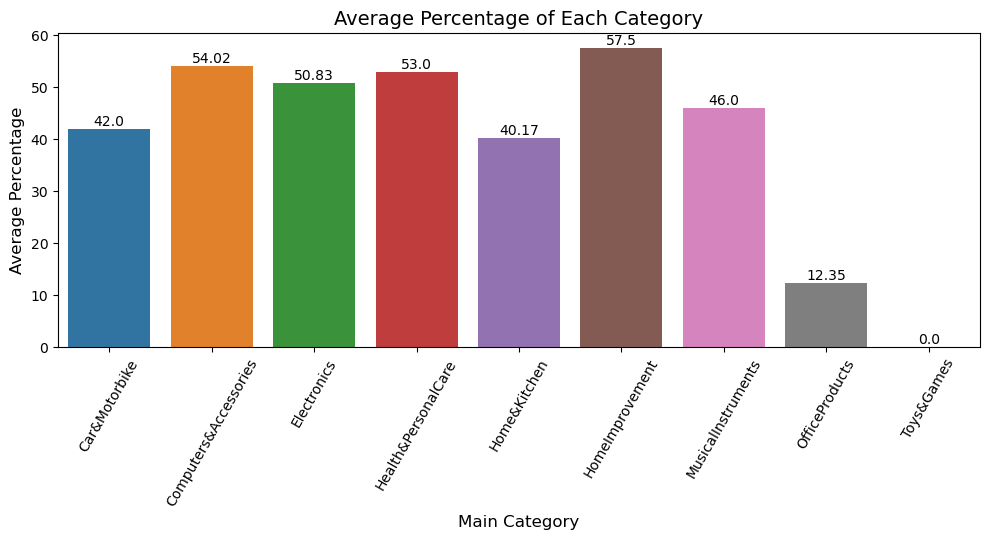

In [27]:
plt.figure(figsize = (10, 5.5))
sns.barplot(data = p, x = 'main_category', y = 'percentage')
plt.xlabel('Main Category', fontsize = 12)
plt.ylabel('Average Percentage', fontsize = 12)
plt.title('Average Percentage of Each Category', fontsize = 14)
plt.xticks(rotation = 60)

for i, n in enumerate(p['percentage']):
    plt.text(i, n, str(round(n, 2)), ha = 'center', va = 'bottom')
    
plt.tight_layout()
plt.show()

# 5. What are the most popular product names?

In [28]:
D = df.groupby(['product_name', 'rating'])['rating_count'].sum().reset_index().sort_values(by = 'rating_count', ascending = False)

In [29]:
D.head()

,product_name,rating,rating_count
101,"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot",4.4,853945
76,"Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black",4.4,426973
75,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black",4.4,426973
511,"JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)",4.1,385177
1256,boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red),4.1,363713


# 7. What are the most popular product reviews?

In [30]:
E = df[['review_id', 'review_title', 'review_content', 'rating_count']]

In [31]:
x = E.groupby(['review_title', 'review_content'])['review_id'].count().reset_index().sort_values(by = 'review_id', ascending = False)

In [32]:
x.head(3)

,review_title,review_content,review_id
834,"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good","I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung interface is very handful for easy use. Battery is superb, last whole day. Camera is mediocre but provide original colour pictures. All in all satisfied with this smartphone that i got in sale for 9499.,Unable to do video call within same service provider as in VOLTE within same service provider video call feature is available.,Product is fine. Nothing Fancy but for the budget it is a good phone.,BATTERY : more than enough for normal use Not sure in gamingCAMERA : good in this segment , can record videos in FHD 30fpsDISPLAY : since it's a LCD display the quality is a bit less , but goodV RAM : you can add upto 2gb of virtual ram but have to sacrifice your storage Space to use it OVERALL A GOOD BUDGET PHONE,Finger print is working speedy battery backup is good camera quality is also good",8
377,"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet","Good product,long wire,Charges good,Nice,I bought this cable for Rs.339 worthy product for this price, i tested it in various charger adapters 33w and 18w it supports fast charging as well.,Good,Ok,I had got this at good price on sale on Amazon and product is useful with warranty but for warranty you need to go very far not practical for such a cost and mine micro to type c connector stopped working after few days only.,I like this product",7
1091,"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable 

# 8. What is the correlation between discounted_price and rating?

In [33]:
cor = df['discounted_price'].corr(df['rating'])

In [34]:
cor

0.0493212369946048

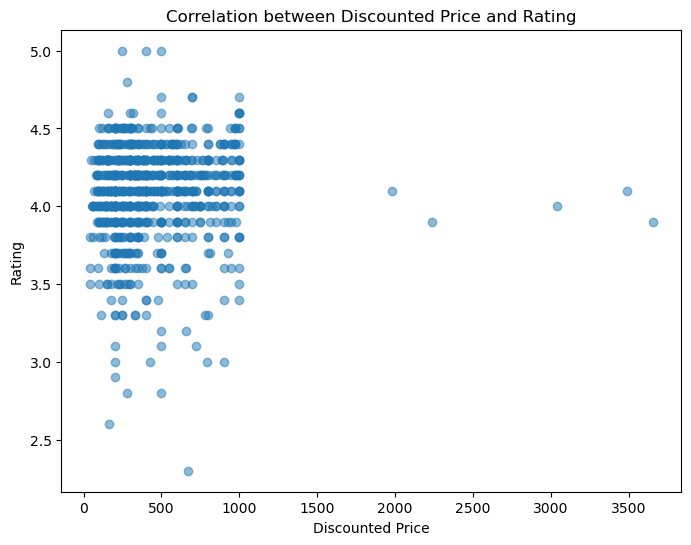

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(df['discounted_price'], df['rating'], alpha=0.5)
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

# 9. What are the Top 5 categories based on the highest ratings?

In [36]:
F = df.groupby('main_category')['rating'].mean().reset_index().sort_values(by = 'rating', ascending = False)

In [37]:
F = F.head()

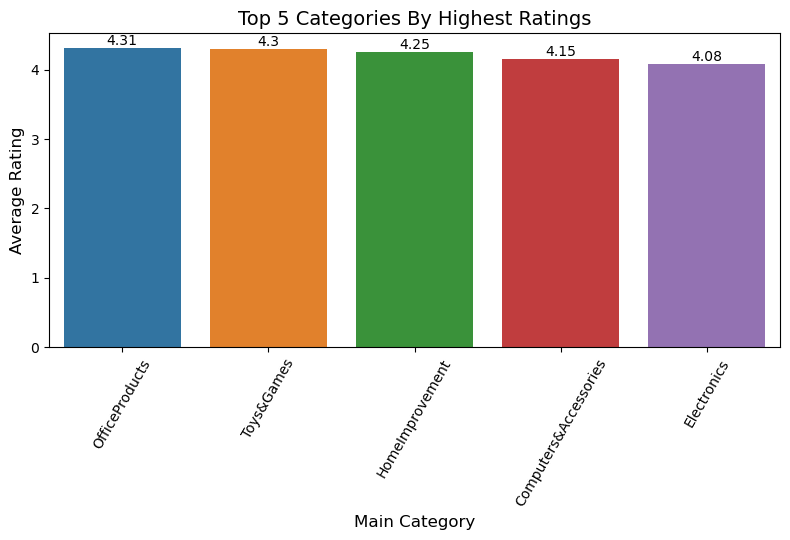

In [38]:
plt.figure(figsize = (8, 5.5))
sns.barplot(data = F, x = 'main_category', y = 'rating')
plt.xlabel('Main Category', fontsize = 12)
plt.ylabel('Average Rating', fontsize = 12)
plt.title('Top 5 Categories By Highest Ratings', fontsize = 14)
plt.xticks(rotation = 60)

for i, n in enumerate(F['rating']):
    plt.text(i, n, str(round(n, 2)), ha = 'center', va = 'bottom')
    
plt.tight_layout()
plt.show()

# 10. Identify any potential areas for improvement or optimization based on the data analysis?

In [39]:
G = df.groupby(['main_category', 'rating'])['rating_count'].count().reset_index()

In [40]:
G

,main_category,rating,rating_count
0,Car&Motorbike,3.8,1
1,Computers&Accessories,3.0,1
2,Computers&Accessories,3.3,4
3,Computers&Accessories,3.4,3
4,Computers&Accessories,3.5,9
5,Computers&Accessories,3.6,7
6,Computers&Accessories,3.7,6
7,Computers&Accessories,3.8,12
8,Computers&Accessories,3.9,33
9,Computers&Accessories,4.0,62


# SPOTIFY EDA

In [41]:
df1 = pd.read_csv('spotify.csv')

In [42]:
df1.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [43]:
df1.shape

(440, 5)

In [44]:
df1.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [45]:
len(df1[df1.duplicated()])

27

In [46]:
df1 = df1.drop_duplicates()

In [47]:
df1.shape

(413, 5)

# 1. Identify the top 5 popular artists based on the mean popularity of their tracks. 

# Show the mean popularity of tracks for the top 5 popular artists Using BarPlot.

In [48]:
A1 = df1.groupby('Artist')['Popularity'].mean().reset_index().sort_values(by = 'Popularity', ascending = False)

In [49]:
A1 = A1.head()

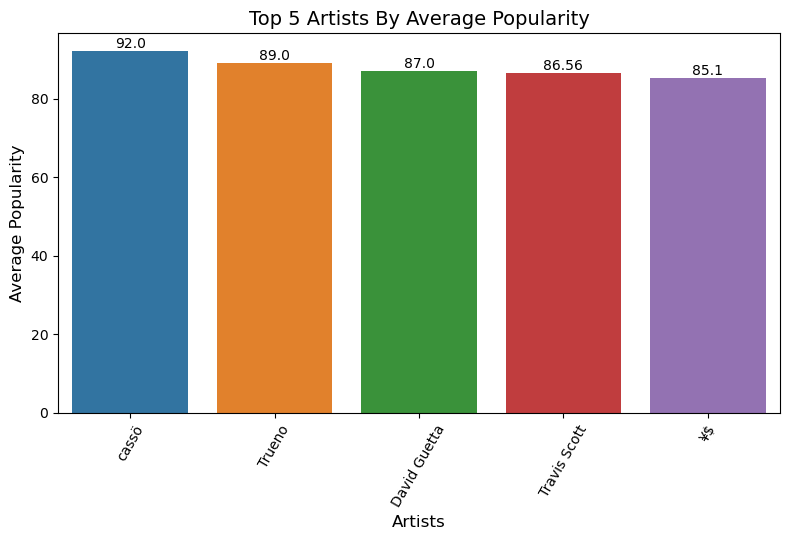

In [50]:
plt.figure(figsize = (8, 5.5))
sns.barplot(data = A1, x = 'Artist', y = 'Popularity')
plt.xlabel('Artists', fontsize = 12)
plt.ylabel('Average Popularity', fontsize = 12)
plt.title('Top 5 Artists By Average Popularity', fontsize = 14)
plt.xticks(rotation = 60)

for i, n in enumerate(A1['Popularity']):
    plt.text(i, n, str(round(n, 2)), ha = 'center', va = 'bottom')
    
plt.tight_layout()
plt.show()

# 2. Determine the top 5 popular songs based on their popularity ratings.

# Display the popularity ratings of the top 5 popular songs using BarPlot

In [51]:
B1 = df1.groupby('Track Name')['Popularity'].max().reset_index().sort_values(by = 'Popularity', ascending = False)

In [52]:
B1 = B1.head()

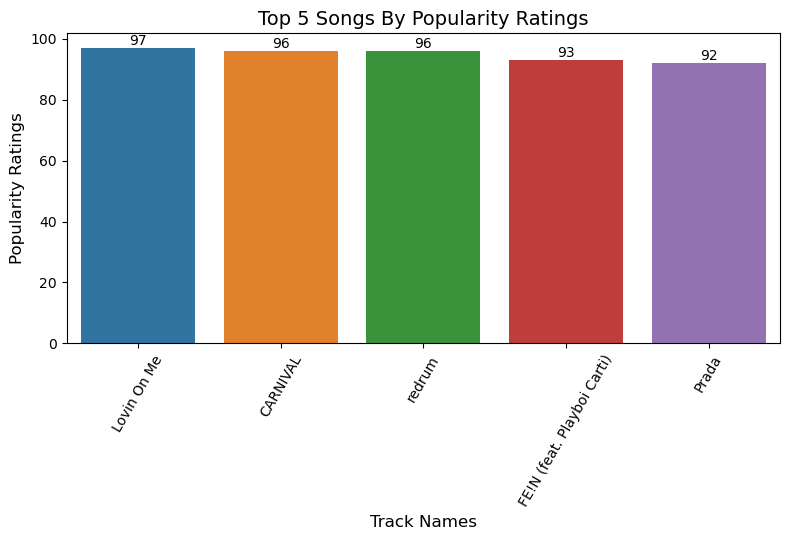

In [53]:
plt.figure(figsize = (8, 5.5))
sns.barplot(data = B1, x = 'Track Name', y = 'Popularity')
plt.xlabel('Track Names', fontsize = 12)
plt.ylabel('Popularity Ratings', fontsize = 12)
plt.title('Top 5 Songs By Popularity Ratings', fontsize = 14)
plt.xticks(rotation = 60)

for i, n in enumerate(B1['Popularity']):
    plt.text(i, n, str(round(n, 2)), ha = 'center', va = 'bottom')
    
plt.tight_layout()
plt.show()

# 3. Find the top 5 trending genres based on the mean popularity of tracks within each genre.

# Visualize the mean popularity of tracks for the top 5 trending genres.

In [54]:
C1 = df1.groupby('Artist')['Popularity'].agg(['sum', 'count']).reset_index()

In [55]:
def find(data):
    d = {'Artist' : [], 'Avg_Popularity' : []}
    for i, z in data.iterrows():
        d['Artist'].append(z['Artist'])
        m = z['sum'] / z['count']
        d['Avg_Popularity'].append(m)
    return d

C11 = find(C1)

In [56]:
C111 = pd.DataFrame(C11).sort_values(by = 'Avg_Popularity', ascending = False)

In [57]:
C111 = C111.head()

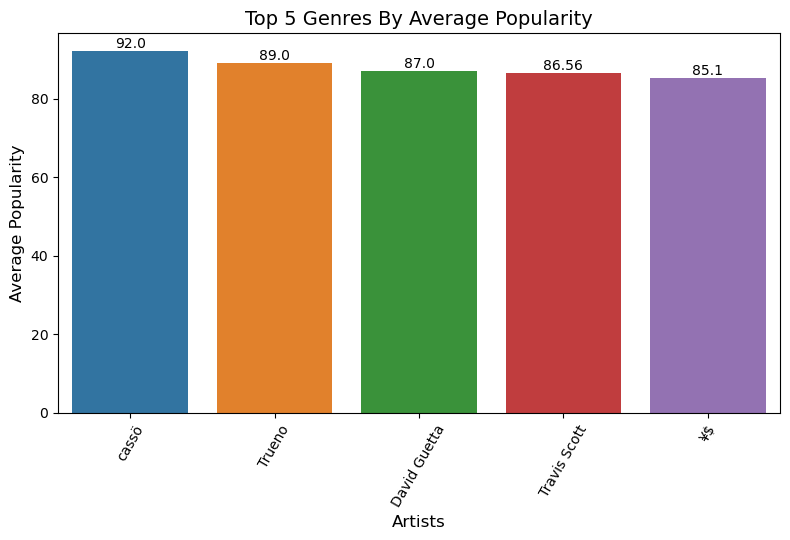

In [58]:
plt.figure(figsize = (8, 5.5))
sns.barplot(data = C111, x = 'Artist', y = 'Avg_Popularity')
plt.xlabel('Artists', fontsize = 12)
plt.ylabel('Average Popularity', fontsize = 12)
plt.title('Top 5 Genres By Average Popularity', fontsize = 14)
plt.xticks(rotation = 60)

for i, n in enumerate(C111['Avg_Popularity']):
    plt.text(i, n, str(round(n, 2)), ha = 'center', va = 'bottom')
    
plt.tight_layout()
plt.show()

# 4. Identify the top 5 longest songs among the tracks of the top 5 popular artists.

# Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot.

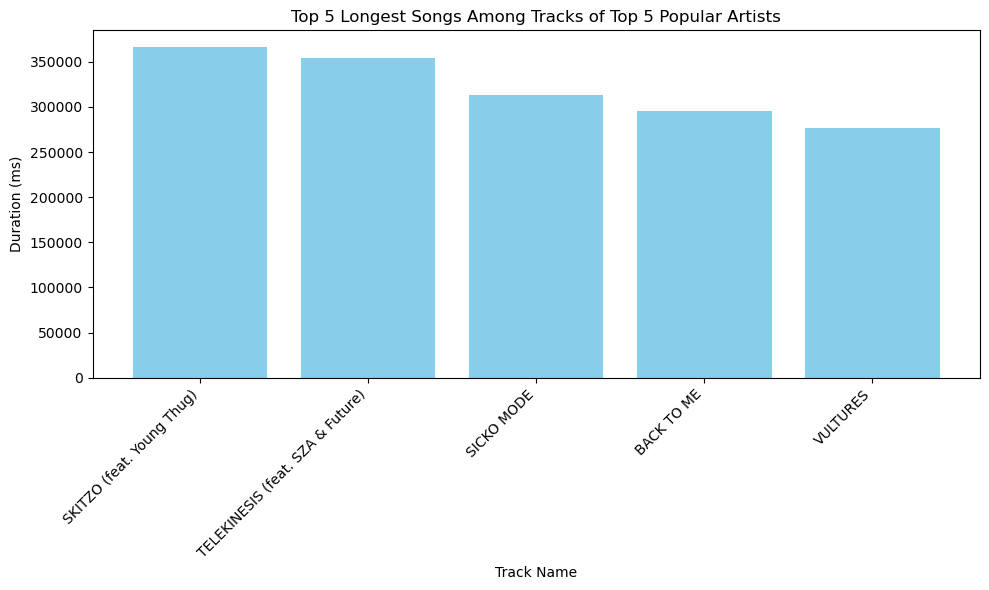

In [59]:
artist_popularity = df1.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

top_5_artists = artist_popularity.head(5).index.tolist()

top_5_artists_tracks = df1[df1['Artist'].isin(top_5_artists)]

top_5_longest_songs = top_5_artists_tracks.nlargest(5, 'Duration (ms)')

plt.figure(figsize=(10, 6))
plt.bar(top_5_longest_songs['Track Name'], top_5_longest_songs['Duration (ms)'], color='skyblue')
plt.xlabel('Track Name')
plt.ylabel('Duration (ms)')
plt.title('Top 5 Longest Songs Among Tracks of Top 5 Popular Artists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Determine the top 5 most danceable songs based on their danceability scores.

# Illustrate the danceability scores of the top 5 most danceable songs using PieChart

In [60]:
df1.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [61]:
df1['Dance'] = df1['Track Name'].apply(lambda x : x if 'Dance' in x else 'None')

In [62]:
df1.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID,Dance
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,None
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,One Dance
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE,None
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU,None
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe,None


In [63]:
df1['Dance'].unique()

array(['None', 'One Dance'], dtype=object)

In [64]:
len(df1['Track Name'].unique())

412

In [65]:
len(df1)

413

# THANK YOU FOR GIVING THIS ASSIGNMENT